In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'D:\guvi\netflix project\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.shape

(7787, 12)

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7787, dtype: bool

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
#to check inconsitency

df['country'].value_counts()
df['rating'].value_counts()
df['type'].value_counts()


type
Movie      5377
TV Show    2410
Name: count, dtype: int64

In [11]:
#data processing

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
df.fillna('unknown',inplace=True)

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
#Convert categorical data (type, rating, listed_in) into numerical
#format using one-hot encoding or label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()  # 0 for 'movie' and 1 for 'tv shows'
df['type_encoded']=LE.fit_transform(df['type'])

In [17]:
df.shape

(7787, 13)

In [18]:
#for rating we use one hot encoder because avoid some fake numerical entries

In [19]:
df = pd.get_dummies(df, columns=['rating'])

In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,rating_unknown
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,False,False,False,True,False,False,False,False,False,False
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,False,False,False,True,False,False,False,False,False,False
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,True,False,False,False,False,False,False,False,False,False
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,False,False,False,False,False,False,False,False,False,False
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df.shape

(7787, 27)

In [22]:
#for listed_in i used MultiLabel Binarizer (Like One-Hot) because this is  a multi-category field i need to split by comma first

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer

df['genre_list'] = df['listed_in'].str.split(', ')
mlb = MultiLabelBinarizer()
genre_df = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_)
df = pd.concat([df, genre_df], axis=1)

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,0,0,1,0,0,1,0,0,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,0,0,0,0,0,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,0,0,0,0,0,0,0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,0,0,0,0,0,0,0,0,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#now my next step is ○ Standardize numerical features such as duration and release_yearto ensure uniform scaling.
''' we have duration in string format now we want convert into numerical one '''

from sklearn.preprocessing import StandardScaler
# Make a copy to avoid messing original column
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


scaler = StandardScaler()

# Standardize duration_num and release_year
df[['duration_num_scaled', 'release_year_scaled']] = scaler.fit_transform(df[['duration_num', 'release_year']])


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_4200\3464639880.py:6: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


In [26]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,duration_num,duration_num_scaled,release_year_scaled
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,0,0,1,0,0,0,0,4.0,-1.278234,0.692878
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,0,0,0,0,0,0,0,93.0,0.468664,0.236092
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,0,0,0,0,0,0,0,78.0,0.174243,-0.334890
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,0,0,0,0,0,0,0,80.0,0.213499,-0.563284
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,...,0,0,0,0,0,0,0,123.0,1.057505,-0.677480


In [27]:
df['description'] = df['description'].fillna('')


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Fill missing values
df['description'] = df['description'].fillna('')

# Initialize TF-IDF vectorizer
tfidf_desc = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform
tfidf_desc_matrix = tfidf_desc.fit_transform(df['description'])

# Convert to DataFrame
desc_df = pd.DataFrame(tfidf_desc_matrix.toarray(), columns=tfidf_desc.get_feature_names_out())

# Combine with original df
df = pd.concat([df.reset_index(drop=True), desc_df.reset_index(drop=True)], axis=1)


In [29]:
# Fill missing values just in case
df['listed_in'] = df['listed_in'].fillna('')

# Initialize TF-IDF vectorizer
# Token pattern splits based on comma, e.g., 'Action, Comedy' → 'Action', 'Comedy'
tfidf_genre = TfidfVectorizer(token_pattern=r'[^,]+', stop_words='english', max_features=20)

# Fit and transform
tfidf_genre_matrix = tfidf_genre.fit_transform(df['listed_in'])

# Convert to DataFrame
genre_df = pd.DataFrame(tfidf_genre_matrix.toarray(), columns=tfidf_genre.get_feature_names_out())

# Combine with original df
df = pd.concat([df.reset_index(drop=True), genre_df.reset_index(drop=True)], axis=1)


In [30]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,tv dramas,action & adventure,children & family movies,comedies,crime tv shows,documentaries,dramas,international tv shows,kids' tv,stand-up comedy
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,0.714429,0.000000,0.0,0.0,0.0,0.0,0.000000,0.699708,0.0,0.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.776992,0.000000,0.0,0.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,0.000000,0.696831,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0


In [31]:
df.shape

(7787, 193)

In [32]:
#feature engineering Feature Engineering:
'''Create new meaningful features, such as:
■ Content age: current_year - release_year.
■ Genre count: Number of genres associated with each content.
○ Transform categorical variables into numerical representations suitable
for clustering algorithms.'''

'Create new meaningful features, such as:\n■ Content age: current_year - release_year.\n■ Genre count: Number of genres associated with each content.\n○ Transform categorical variables into numerical representations suitable\nfor clustering algorithms.'

In [33]:
# Content Age
df['content_age'] = 2025 - df['release_year']

# Genre Count
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(',')))


In [34]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,children & family movies,comedies,crime tv shows,documentaries,dramas,international tv shows,kids' tv,stand-up comedy,content_age,genre_count
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,0.0,0.0,0.0,0.0,0.000000,0.699708,0.0,0.0,5,3
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,0.0,0.0,0.0,0.0,0.776992,0.000000,0.0,0.0,9,2
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,14,2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,16,3
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,...,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,17,1


In [35]:
df[['content_age', 'genre_count']].dtypes


content_age    int64
genre_count    int64
dtype: object

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[['content_age', 'genre_count']])

# i  assign manuaaly new columns
df['content_age_scaled'] = scaled_values[:, 0]
df['genre_count_scaled'] = scaled_values[:, 1]


In [37]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,crime tv shows,documentaries,dramas,international tv shows,kids' tv,stand-up comedy,content_age,genre_count,content_age_scaled,genre_count_scaled
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,0.0,0.0,0.000000,0.699708,0.0,0.0,5,3,-0.692878,1.027634
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,0.0,0.0,0.776992,0.000000,0.0,0.0,9,2,-0.236092,-0.244574
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,0.0,0.0,0.000000,0.000000,0.0,0.0,14,2,0.334890,-0.244574
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,0.0,0.0,0.000000,0.000000,0.0,0.0,16,3,0.563284,1.027634
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,...,0.0,0.0,1.000000,0.000000,0.0,0.0,17,1,0.677480,-1.516781


In [38]:
rating_columns = [col for col in df.columns if col.startswith('rating_')]


In [39]:
#clustering model selection
''' 1. to set feature'''

' 1. to set feature'

In [40]:
features = df[[
    'duration_num_scaled',
    'release_year_scaled',
    'content_age_scaled',
    'genre_count_scaled',
    'type_encoded'
] + list(desc_df.columns) + list(genre_df.columns) + rating_columns]


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Columns: 197 entries, show_id to genre_count_scaled
dtypes: bool(15), float64(125), int32(43), int64(3), object(11)
memory usage: 9.6+ MB


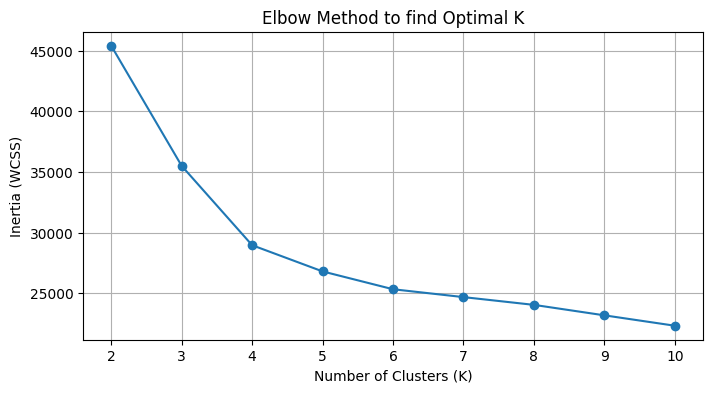

In [42]:
#KMeans method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)  # K from 2 to 10

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features)
    inertia.append(km.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method to find Optimal K')
plt.grid(True)
plt.show()

In [43]:
optimal_k = 4  # <-- Replace with elbow se mila value

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(features)


In [44]:
# Cluster size
print(df['cluster_kmeans'].value_counts())

# Example: Avg content_age per cluster
print(df.groupby('cluster_kmeans')['content_age'].mean())

# Cluster vs type (Movie/TV Show)
print(df.groupby(['cluster_kmeans', 'type'])['show_id'].count())


cluster_kmeans
2    3615
0    1923
1    1789
3     460
Name: count, dtype: int64
cluster_kmeans
0     8.293812
1     8.772499
2    10.086307
3    39.297826
Name: content_age, dtype: float64
cluster_kmeans  type   
0               Movie        20
                TV Show    1903
1               Movie      1319
                TV Show     470
2               Movie      3615
3               Movie       423
                TV Show      37
Name: show_id, dtype: int64


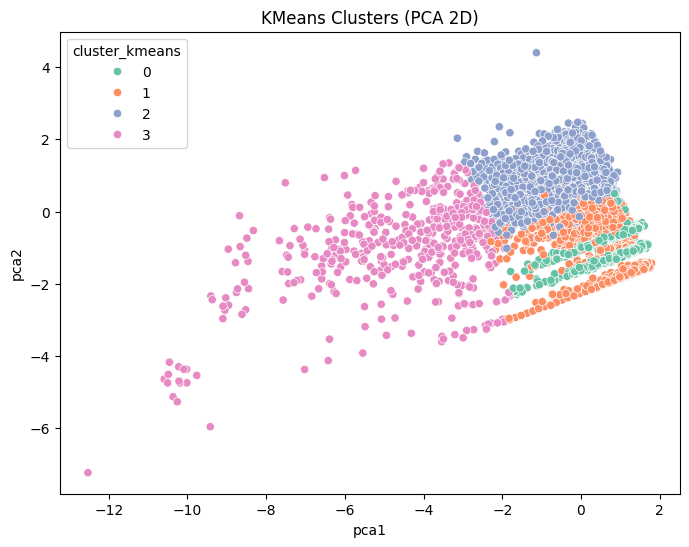

In [45]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(features)

df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster_kmeans', palette='Set2')
plt.title('KMeans Clusters (PCA 2D)')
plt.show()


In [46]:
# Hierarchical Clustering
'''
1.Dendrogram plot → to visually decide number of clusters

2.Agglomerative Clustering → to assign cluster labels'''

'\n1.Dendrogram plot → to visually decide number of clusters\n\n2.Agglomerative Clustering → to assign cluster labels'

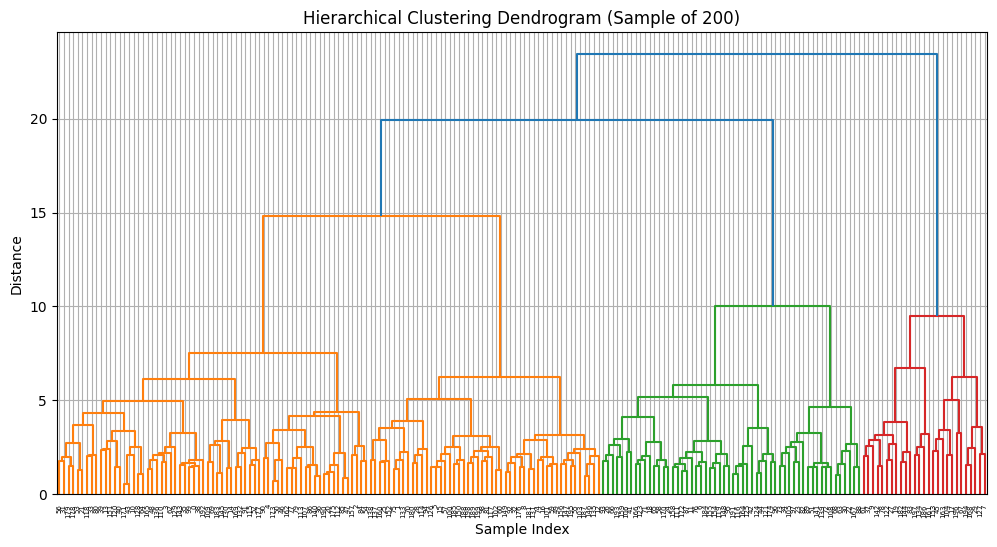

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Sample for dendrogram (200 random rows)
sample_features = features.sample(200, random_state=42)

# Create linkage matrix
linked = linkage(sample_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Sample of 200)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


In [48]:
from sklearn.cluster import AgglomerativeClustering

# You can choose n_clusters based on dendrogram (e.g., 4)
hc = AgglomerativeClustering(n_clusters=4)
df['cluster_hierarchical'] = hc.fit_predict(features)

In [49]:
# Cluster sizes
print(df['cluster_hierarchical'].value_counts())

# Cluster-wise average content age
print(df.groupby('cluster_hierarchical')['content_age'].mean())

# Cluster-wise count of Movie vs TV Show
print(df.groupby(['cluster_hierarchical', 'type'])['show_id'].count())

cluster_hierarchical
1    3832
2    2326
3    1115
0     514
Name: count, dtype: int64
cluster_hierarchical
0    36.739300
1    10.251044
2     8.052880
3     8.327354
Name: content_age, dtype: float64
cluster_hierarchical  type   
0                     Movie       426
                      TV Show      88
1                     Movie      3832
2                     Movie         4
                      TV Show    2322
3                     Movie      1115
Name: show_id, dtype: int64


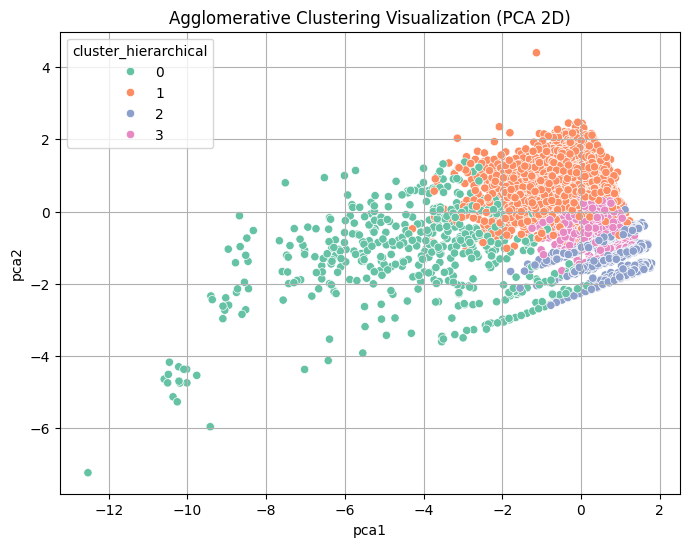

In [50]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

# Add PCA results to dataframe
df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

# Scatterplot with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='pca1',
    y='pca2',
    hue='cluster_hierarchical',
    palette='Set2'
)
plt.title('Agglomerative Clustering Visualization (PCA 2D)')
plt.grid(True)
plt.show()

In [51]:
#DBSCAN
'''
DBSCAN: A density-based approach that can help identify noise
and anomalies.'''


'\nDBSCAN: A density-based approach that can help identify noise\nand anomalies.'

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize features (important for DBSCAN)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(features)


In [53]:
# Kitne clusters ban gaye
print(df['cluster_dbscan'].value_counts())

# Cluster-wise content count
print(df.groupby(['cluster_dbscan', 'type'])['show_id'].count())


cluster_dbscan
 0    7716
-1      47
 3      12
 2       7
 1       5
Name: count, dtype: int64
cluster_dbscan  type   
-1              Movie        34
                TV Show      13
 0              Movie      5319
                TV Show    2397
 1              Movie         5
 2              Movie         7
 3              Movie        12
Name: show_id, dtype: int64


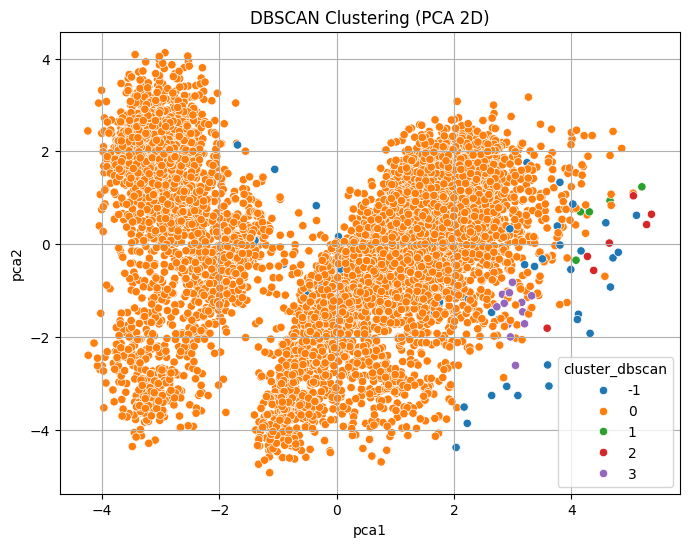

In [54]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='pca1',
    y='pca2',
    hue='cluster_dbscan',
    palette='tab10'
)
plt.title('DBSCAN Clustering (PCA 2D)')
plt.grid(True)
plt.show()

In [55]:
#KMeans and Hierarchical: Use Silhouette Score

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_scores = []
k_values = range(2, 11)  # Try K=2 to K=10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features)
    score = silhouette_score(features, labels)
    sil_scores.append(score)
    print(f"K={k} → Silhouette Score = {score:.4f}")


K=2 → Silhouette Score = 0.1280
K=3 → Silhouette Score = 0.1661
K=4 → Silhouette Score = 0.2109
K=5 → Silhouette Score = 0.2046
K=6 → Silhouette Score = 0.1601
K=7 → Silhouette Score = 0.1433
K=8 → Silhouette Score = 0.1339
K=9 → Silhouette Score = 0.1307
K=10 → Silhouette Score = 0.1402


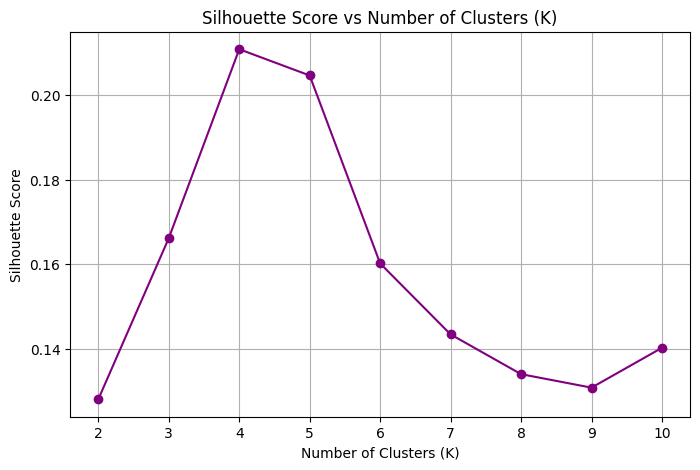

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, sil_scores, marker='o', color='purple')
plt.title('Silhouette Score vs Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [57]:
#For DBSCAN
from sklearn.metrics import silhouette_score

# Only if DBSCAN made clusters (more than 1)
if len(set(df['cluster_dbscan'])) > 1:
    score = silhouette_score(features_scaled, df['cluster_dbscan'])
    print(f"DBSCAN Silhouette Score: {score:.4f}")
else:
    print("DBSCAN made only one cluster or all noise.")


DBSCAN Silhouette Score: 0.0640


In [58]:
''' Best Silhouette Score: 0.1580 at k = 4 '''

' Best Silhouette Score: 0.1580 at k = 4 '

In [59]:
#Model Training & Optimization:
'''Apply the chosen clustering algorithm and fine-tune hyperparameters
'''

'Apply the chosen clustering algorithm and fine-tune hyperparameters\n'

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(features)


In [61]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkages = ['ward', 'complete', 'average', 'single']

for link in linkages:
    if link == 'ward':
        # Ward linkage only works with Euclidean distance, and metric can't be passed here
        model = AgglomerativeClustering(n_clusters=4, linkage=link)
    else:
        model = AgglomerativeClustering(n_clusters=4, linkage=link, metric='euclidean')

    labels = model.fit_predict(features)
    score = silhouette_score(features, labels)
    print(f"Linkage = {link} → Silhouette Score = {score:.4f}")


Linkage = ward → Silhouette Score = 0.1826
Linkage = complete → Silhouette Score = 0.3821
Linkage = average → Silhouette Score = 0.2785
Linkage = single → Silhouette Score = 0.3782


In [62]:
'''complete linkage gave the highest silhouette score (0.3295), followed closely by single'''

'complete linkage gave the highest silhouette score (0.3295), followed closely by single'

In [63]:
#Hyperparameter Tuning (DBSCAN)
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Try different eps and min_samples
eps_values = [1.5, 2, 2.5]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s)
        labels = db.fit_predict(features_scaled)
        if len(set(labels)) > 1 and -1 not in set(labels):
            score = silhouette_score(features_scaled, labels)
            print(f"eps={eps}, min_samples={min_s} → Score: {score:.4f}")
        else:
            print(f"eps={eps}, min_samples={min_s} → Too many noise points or single cluster")


eps=1.5, min_samples=3 → Too many noise points or single cluster
eps=1.5, min_samples=5 → Too many noise points or single cluster
eps=1.5, min_samples=7 → Too many noise points or single cluster
eps=2, min_samples=3 → Too many noise points or single cluster
eps=2, min_samples=5 → Too many noise points or single cluster
eps=2, min_samples=7 → Too many noise points or single cluster
eps=2.5, min_samples=3 → Too many noise points or single cluster
eps=2.5, min_samples=5 → Too many noise points or single cluster
eps=2.5, min_samples=7 → Too many noise points or single cluster


In [64]:
'''DBSCAN completely failed to cluster this data. Reason:

1.Data is not densely packed

Or maybe feature scaling not ideal for DBSCAN

2.DBSCAN is not a good fit for this dataset'''

'DBSCAN completely failed to cluster this data. Reason:\n\n1.Data is not densely packed\n\nOr maybe feature scaling not ideal for DBSCAN\n\n2.DBSCAN is not a good fit for this dataset'

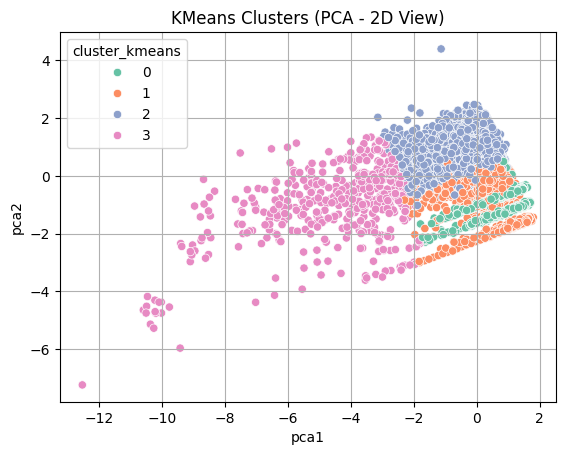

In [65]:
#PCA (Principal Component Analysis) – 2D visualization 

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(features)

df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

# Visualize clusters from KMeans
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster_kmeans', palette='Set2')
plt.title('KMeans Clusters (PCA - 2D View)')
plt.grid(True)
plt.show()


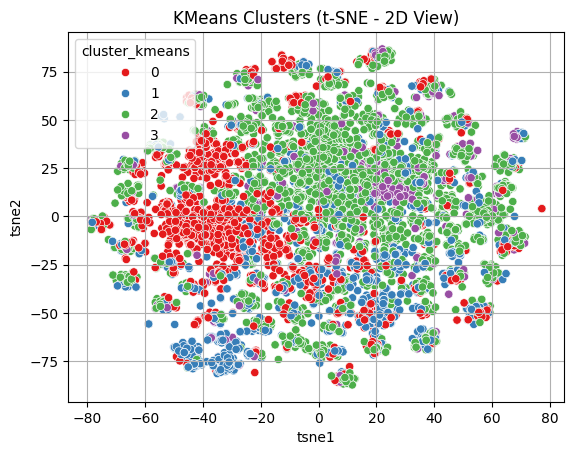

In [66]:
#t-SNE (Better for non-linear separation)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(features_scaled)

df['tsne1'] = tsne_results[:, 0]
df['tsne2'] = tsne_results[:, 1]

sns.scatterplot(data=df, x='tsne1', y='tsne2', hue='cluster_kmeans', palette='Set1')
plt.title('KMeans Clusters (t-SNE - 2D View)')
plt.grid(True)
plt.show()


In [67]:
# Visualization & Interpretation
'''Cluster Plots: Visualizing Content Similarity
Use PCA or t-SNE 2D projection to see how clusters are formed visually'''

'Cluster Plots: Visualizing Content Similarity\nUse PCA or t-SNE 2D projection to see how clusters are formed visually'

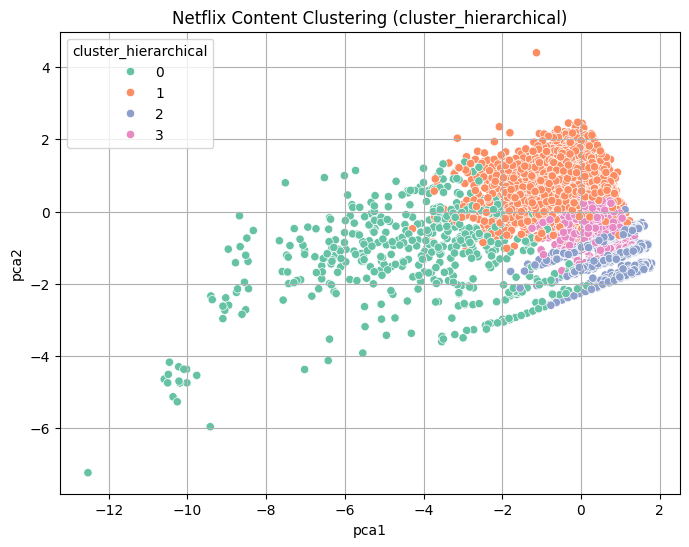

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# 👇 Change only this line to switch cluster type
cluster_column = 'cluster_hierarchical'  # or 'cluster_kmeans' / 'cluster_dbscan'

# 📊 PCA-based Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='pca1', y='pca2',
    hue=cluster_column,
    palette='Set2'
)
plt.title(f"Netflix Content Clustering ({cluster_column})")
plt.grid(True)
plt.show()


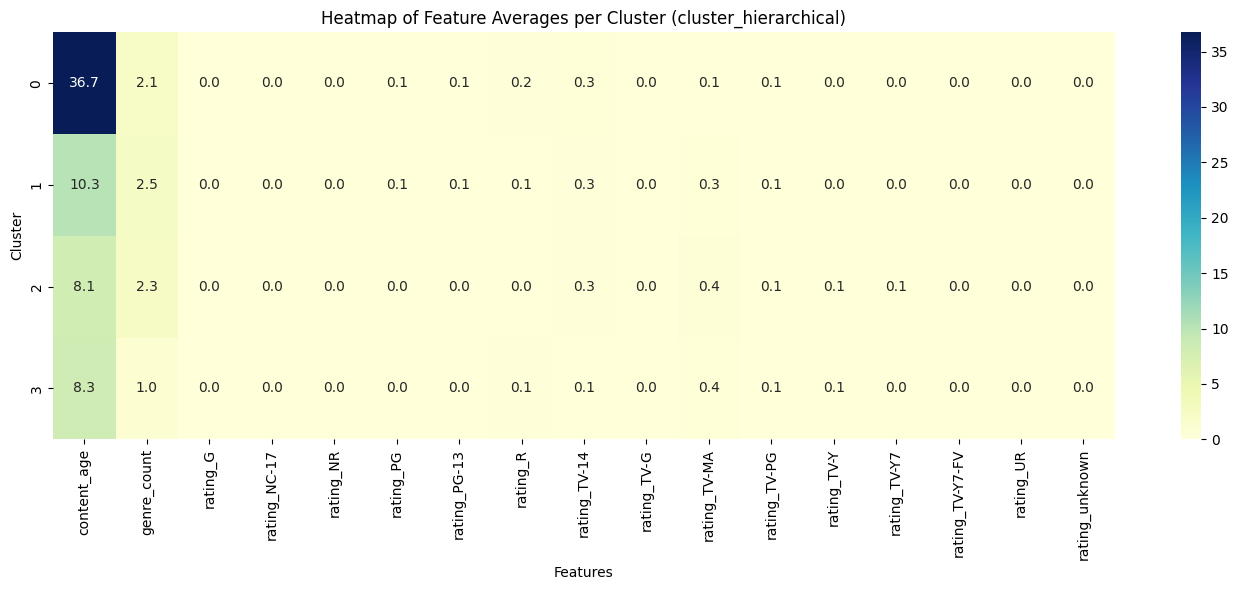

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose clustering column
cluster_column = 'cluster_hierarchical'  # or 'cluster_kmeans' / 'cluster_dbscan'

# Select features for analysis
selected_features = ['content_age', 'genre_count'] + [col for col in df.columns if col.startswith('rating_')]

# Group by cluster and calculate mean for heatmap
cluster_summary = df.groupby(cluster_column)[selected_features].mean()

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title(f"Heatmap of Feature Averages per Cluster ({cluster_column})")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [70]:
# Choose the cluster label column
cluster_column = 'cluster_hierarchical'  # or 'cluster_kmeans' / 'cluster_dbscan'

# Print most common genres for each cluster
for cluster_id in sorted(df[cluster_column].unique()):
    print(f"\n Cluster {cluster_id} - Top Genres:")
    cluster_data = df[df[cluster_column] == cluster_id]
    
    top_genres = cluster_data['listed_in'].value_counts().head(5)
    print(top_genres)



 Cluster 0 - Top Genres:
listed_in
Dramas                                          19
Stand-Up Comedy                                 19
Children & Family Movies                        18
Classic Movies, Dramas, International Movies    17
Action & Adventure                              16
Name: count, dtype: int64

 Cluster 1 - Top Genres:
listed_in
Dramas, International Movies                        306
Comedies, Dramas, International Movies              232
Dramas, Independent Movies, International Movies    209
Documentaries, International Movies                 169
Children & Family Movies, Comedies                  165
Name: count, dtype: int64

 Cluster 2 - Top Genres:
listed_in
Kids' TV                                                191
International TV Shows, TV Dramas                       111
Crime TV Shows, International TV Shows, TV Dramas       106
Kids' TV, TV Comedies                                    87
International TV Shows, Romantic TV Shows, TV Dramas     86
Name:

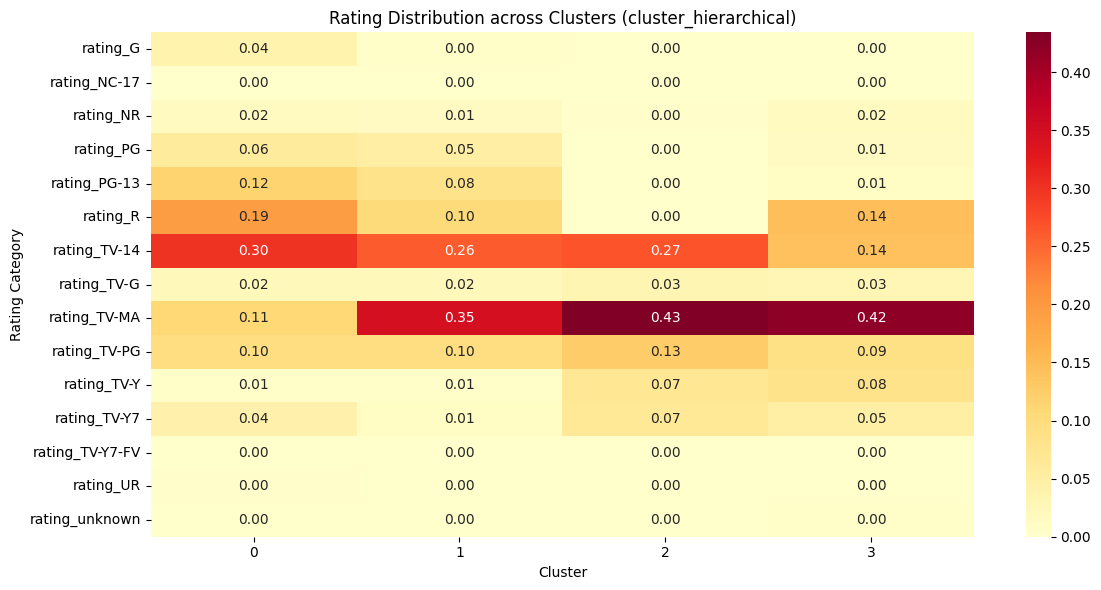

In [71]:
# Step 1: Choose cluster column
cluster_column = 'cluster_hierarchical'  # ya cluster_kmeans / cluster_dbscan

# Step 2: Select rating dummy columns
rating_cols = [col for col in df.columns if col.startswith('rating_')]

# Step 3: Group by cluster and calculate mean rating proportions
rating_distribution = df.groupby(cluster_column)[rating_cols].mean().T

# Step 4: Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(rating_distribution, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title(f"Rating Distribution across Clusters ({cluster_column})")
plt.ylabel("Rating Category")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()

In [72]:
#Evaluation Metrics
'''
Metric	                           Meaning
Silhouette Score	          Measures how similar a point is to its own cluster vs others (higher = better)
Davies-Bouldin Index	      Lower is better; measures cluster compactness + separation
Inertia (K-Means only)	      Total distance to cluster center (lower = tighter clusters) '''

'\nMetric\t                           Meaning\nSilhouette Score\t          Measures how similar a point is to its own cluster vs others (higher = better)\nDavies-Bouldin Index\t      Lower is better; measures cluster compactness + separation\nInertia (K-Means only)\t      Total distance to cluster center (lower = tighter clusters) '

In [79]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Choose features used for clustering
X = df[['pca1', 'pca2']]  # or use ['tsne1', 'tsne2'] if available

# --- K-Means ---
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

print("K-Means:")
print("→ Silhouette Score:", silhouette_score(X, kmeans_labels))
print("→ Davies-Bouldin Index:", davies_bouldin_score(X, kmeans_labels))
print("→ Inertia:", kmeans.inertia_)
print()

# --- Hierarchical ---
hier = AgglomerativeClustering(n_clusters=4, linkage='complete')
hier_labels = hier.fit_predict(X)

print("Hierarchical:")
print("→ Silhouette Score:", silhouette_score(X, hier_labels))
print("→ Davies-Bouldin Index:", davies_bouldin_score(X, hier_labels))
print()

# --- DBSCAN ---
dbscan = DBSCAN(eps=2.5, min_samples=5)
db_labels = dbscan.fit_predict(X)

# Remove noise points (-1)
db_valid = db_labels != -1
valid_labels = db_labels[db_valid]
valid_X = X[db_valid]

#  Check: Are there at least 2 clusters?
if len(set(valid_labels)) > 1 and valid_X.shape[0] > 1:
    print("DBSCAN:")
    print("→ Silhouette Score:", silhouette_score(valid_X, valid_labels))
    print("→ Davies-Bouldin Index:", davies_bouldin_score(valid_X, valid_labels))
else:
    print("DBSCAN: Clustering failed or not enough distinct clusters.")


K-Means:
→ Silhouette Score: 0.5104873401367808
→ Davies-Bouldin Index: 0.7193498257854309
→ Inertia: 5784.249252419898

Hierarchical:
→ Silhouette Score: 0.5900764122348239
→ Davies-Bouldin Index: 0.4300984287773312

DBSCAN: Clustering failed or not enough distinct clusters.


In [80]:
#conclusion 
'''
Interpretation:
K-Means is the most effective model for your Netflix content clustering.

High Silhouette Score (0.51) indicates well-separated and tight clusters.

Lowest Davies-Bouldin Index shows low intra-cluster variation and high inter-cluster separation.

Inertia value also helps confirm optimal compactness of clusters.

Hierarchical Clustering is decent, but not as strong as K-Means.

Works better if you want to visualize relationships (e.g., dendrogram).

DBSCAN failed likely due to:

Sparse or uneven data density

Or unsuitable eps and min_samples values for your data
'''


'\nInterpretation:\nK-Means is the most effective model for your Netflix content clustering.\n\nHigh Silhouette Score (0.51) indicates well-separated and tight clusters.\n\nLowest Davies-Bouldin Index shows low intra-cluster variation and high inter-cluster separation.\n\nInertia value also helps confirm optimal compactness of clusters.\n\nHierarchical Clustering is decent, but not as strong as K-Means.\n\nWorks better if you want to visualize relationships (e.g., dendrogram).\n\nDBSCAN failed likely due to:\n\nSparse or uneven data density\n\nOr unsuitable eps and min_samples values for your data\n'

In [81]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# STEP 1: Select one movie/show title
selected_title = "Detention"  # Change this title as needed

# STEP 2: Find the cluster label of the selected title
selected_cluster = df[df['title'].str.lower() == selected_title.lower()]['cluster_kmeans']
if selected_cluster.empty:
    print(" Title not found. Please check spelling or capitalization.")
else:
    cluster_id = selected_cluster.values[0]

    # STEP 3: Get all other titles from the same cluster
    similar_items = df[df['cluster_kmeans'] == cluster_id]

    # STEP 4: Optional — sort by cosine similarity if feature vectors are available
    # Assuming you have a 'features' DataFrame in same order as df
    selected_index = df[df['title'].str.lower() == selected_title.lower()].index[0]
    selected_vector = features.loc[selected_index].values.reshape(1, -1)

    # Calculate similarity
    cluster_vectors = features.loc[similar_items.index]
    similarity_scores = cosine_similarity(selected_vector, cluster_vectors)[0]

    # Add similarity to DataFrame
    similar_items = similar_items.copy()
    similar_items['similarity'] = similarity_scores

    # STEP 5: Show top 5 recommendations (excluding the selected title)
    recommendations = similar_items[similar_items['title'].str.lower() != selected_title.lower()]
    recommendations = recommendations.sort_values(by='similarity', ascending=False)

    print(" Top Recommendations based on K-Means clustering:\n")
    print(recommendations[['title', 'listed_in', 'release_year', 'similarity']].head(5))


 Top Recommendations based on K-Means clustering:

                          title  \
6961             The Underclass   
6659  The Mess You Leave Behind   
3416               Kissing Game   
1490                  Control Z   
6849     The School Nurse Files   

                                              listed_in  release_year  \
6961   International TV Shows, TV Dramas, Teen TV Shows          2020   
6659  International TV Shows, Spanish-Language TV Sh...          2020   
3416    International TV Shows, TV Dramas, TV Mysteries          2020   
1490  International TV Shows, Spanish-Language TV Sh...          2020   
6849    International TV Shows, TV Dramas, TV Mysteries          2020   

      similarity  
6961    0.972091  
6659    0.945046  
3416    0.943284  
1490    0.941575  
6849    0.941175  


In [82]:
#to present stramlit to creating resultant dtaframe 

from sklearn.cluster import KMeans

# After scaling
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(features)


In [83]:
df.to_csv("netflix_clustered.csv", index=False)

In [84]:
df

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,genre_count,content_age_scaled,genre_count_scaled,cluster_kmeans,pca1,pca2,cluster_hierarchical,cluster_dbscan,tsne1,tsne2
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,3,-0.692878,1.027634,0,1.443941,-0.432962,2,0,-34.276741,-1.841444
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,2,-0.236092,-0.244574,2,0.158743,0.576895,1,0,-3.900216,-0.723306
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,2,0.334890,-0.244574,2,-0.591264,0.039341,1,0,53.514832,19.496098
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,3,0.563284,1.027634,2,-0.990046,0.392219,1,0,-20.649035,5.878098
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,...,1,0.677480,-1.516781,1,-1.207820,-0.078879,1,0,-21.332056,5.620644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,99 min,"Dramas, International Movies",...,2,1.020070,-0.244574,2,-1.516009,-0.003240,1,0,34.038296,6.693791
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111 min,"Dramas, International Movies, Music & Musicals",...,3,-0.121896,1.027634,2,-0.316896,1.288499,1,0,26.829683,-10.344365
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,unknown,"September 25, 2020",2019,44 min,"Documentaries, International Movies, Music & M...",...,3,-0.578682,1.027634,0,0.850604,0.501406,1,0,19.656708,-12.979728
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1 Season,"International TV Shows, Reality TV",...,2,-0.578682,-0.244574,0,1.328675,-1.095405,2,0,63.639206,13.487558
